# The formation of binary black holes
## Final project for the Laboratory of Computational Physics (mod. A) class - Physics of Data

**February 2023**

Authors:
- Bedin Veronica
- Bhatti Roben
- Bonato Diego
- Sapkas Michail

### Goal of the project

In this notebook a dataset containing almost 2 million instances of simulated isolated binary stars is analized. The goal of this project is to apply different machine learning techniques, in order to understand what are the most important features that determine the evolution of a binary stellar system into merging binary black holes.


You can find the powerpoint presentation of this project here: https://drive.google.com/file/d/1sBosDq757DtW4buCQZ8Ko5RORxjiJHh9/view?usp=sharing 

## Theoretical introduction

Since the first detections of gravitational waves (GWs) in 2015 from the LIGO-VIRGO interferometers, a huge effort has been made from the scientific community to understand the processes underlying their emissions. At this time, almost 90 events of GWs have been recorded, more than 80 of which can be associated to **mergers of binary black holes (BBHs)**, which are now considered to be the main sources of these kind of signals.
 The open question of these years is then to understand how these kind of systems formed from their progenitors, which are the **stellar binaries**, in order to actually interpret the detected signal, linking it to their astronomical sources.
 
In our work we studied almost **2 million simulations of binary stellar systems**, carried out with the rapid-synthesis binary population code MOBSE, searching for the **most important features** that determine the eventual evolution of a binary stellar system into a merging BBH, source of GWs.

Before delving into the details of our analysis, we shall now present some key concepts about the so-called **mass transfer** (MT), which is the main phenomenon involved in the evolution of a stellar binary system into an isolated BBH. 
The main way in which MT can happen is via **Roche Lobe Overflow**.
The Roche lobe of a star in a binary system is that equipotential surface passing through the lagrangian point L1, within which the gravity of the star exceeds the one of its companion.

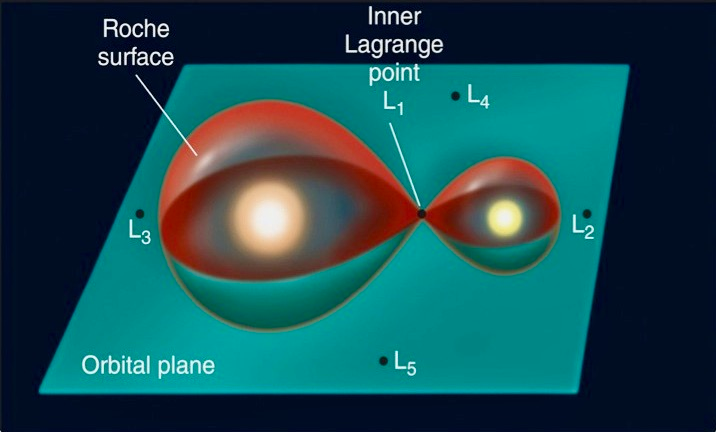

During its evolution, a star can expand beyond its Roche lobe. This will cause the system to undergo a process known as Roche lobe overflow, during which some of the mass of the star (known as donor) is transferred to its companion (the accretor). This process is said to be **stable** if the rate of the mass-transfer is constant, otherwise we say that it’s **unstable** and that the system undergoes a **common envelope** (CE) phase. During this evolutionary stage, the entire binary is surrounded by a single (common) envelope and the nuclei stop corotating with it. Due to friction, some of the angular momentum and orbital energy is converted into internal energy of the envelope.

In the latter case, the evolution of the binary can follow two paths. If the donor doesn’t present a strong **density gradient** between the nucleus and the envelope ( this is the case of a main-seqence star), then the system will merge leaving a single BH, without the emission of GWs. On the other hand, if a **strong gradient** is present, the **envelope can be ejected**, leaving a compact (hardened) binary that will eventually **evolve in a BBH**, that will likely merge via GWs emission. 

The formalism used to describe the physics the CE is the so-called **alpha formalism**. In this kind of description, all the energy necessary to successfully eject the envelope comes from the lost gravitational energy. The efficiency of this conversion is controlled by the **alpha parameter** via the following equation:

$$ \Delta E=\alpha (E_{b,f}-E_{b,i})=\alpha\frac{Gm_{c,1}m_{c,2}}{2}\left(\frac{1}{a_f}-\frac{1}{a_i}\right) $$

where $E_{b,i}$ ($E_{b,f}$) is the orbital binding energy of the two cores before (after) the CE phase, $a_i$ ($a_f$) is the semi-major axis before (after) the CE phase, $m_{c,1}$ and $m_{c,2}$ are the masses of the two cores, and $\alpha$ is a dimensionless parameter that measures which fraction of the removed orbital energy is transferred to the envelope.

A large alpha means that the envelope is easily ejected, while a small alpha means that it takes a lot of energy to be expelled.
There are many uncertainties regarding the exact value of the alpha parameter, depending on the fine details of stellar evolution; in our simulations we considered values  for this parameter ranging from 0.5 to 5 (see the following paragraph for more details).
A value of the alpha parameter different from $\alpha = 1$ can be used to encode other kinds of supplemental energy that contribute to the energy balance of the envelope, such as recombination energy or tidal heating linked to stellar spin.

## Dataset 

The dataframe is stored at this Google Drive [link](https://drive.google.com/drive/folders/1RZGrL6RrKYKaPu0VJ7BQDXptb7B_QOLg).
The compressed file is formed by four folders each one for a different value of the $\alpha$ parameter. Each folder contains a set of simulations for various metalliticies at which the black holes were produced.
From each file we extract the following features:

- Column 0: identifing code of the simulated binary
- Column 1: initial mass (ZAMS mass) of the primary member of the binary system in solar masses ($M_{\odot}$).
- Column 2: initial mass (ZAMS mass) of the secondary member of the binary system ($M_{\odot}$).
- Column 3: mass of the black hole that forms from the primary member ($M_{\odot}$)
- Column 4: mass of the black hole that forms from the secondary member ($M_{\odot}$)
- Column 6: delay time, i.e. time elapsed from the formation of the binary system to the merger of the two black holes (Myr)
- Column 7: semi-major axis of the binary system at the formation of the second- born black hole (in solar radii, $R_{\odot} = 6.95 \cdot 10^{10}$ cm)
- Column 8: orbital eccentricity of the binary system at the formation of the second- born black hole
- Column 21: Boolean variable indicating whether the binary system undergoes a common envelope (True). If column 21 is False, the binary goes via stable mass transfer instead of a common envelope.

We added these extra columns:
- Metalliticy
- Alpha
- Q: Ratio of the initial binary stellar masses [ZAMS Mass 1/ ZAMS Mass 2]
- BHQ: Ratio of the resulting binary black hole masses [Black Hole Mass 1 / Black Hole Mass 2]

# Import the dataset
We compiled the whole dataset and saved it as a csv in a dropbox link. We are able to retrieve the whole dataset anytime.

In [91]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


Let's import the dataset

In [92]:
url='https://www.dropbox.com/s/ipfb37ojm4vznas/dataset.csv?dl=1'
dataset = pd.read_csv(url)
full_dataset=dataset.copy()
full_dataset

,Binary ID,ZAMS Mass 1 [Msun],ZAMS Mass 2 [Msun],Black Hole Mass 1 [Msun],Black Hole Mass 2 [Msun],Formation Delay Time [Myrs],Semi Major Axis [Rsun],Orbital Eccentricity,Formation by Common Envelope,Alpha,Metallicity
0,0_6942,50.9151,50.8356,4.8001,4.7478,2233.6292,7.9524,0.273150,True,0.5,0.0200
1,0_80347,57.0253,56.9464,5.5849,5.5325,1076.5703,9.0222,0.508320,True,0.5,0.0200
2,0_158611,91.0594,90.7083,8.3787,8.2624,6810.4365,14.9810,0.072798,True,0.5,0.0200
3,0_211410,117.9396,57.6917,19.3984,11.2422,7905.6343,11229.0000,0.999640,False,0.5,0.0200
4,0_213101,40.2965,40.2439,3.1045,3.0769,8703.5479,13.7630,0.705290,True,0.5,0.0200
...,...,...,...,...,...,...,...,...,...,...,...
2443713,4_1998897,49.0692,19.8077,16.2246,16.4283,1327.5031,16.3610,0.015313,False,5.0,0.0016
2443714,4_1999111,123.4732,45.1362,38.2710,35.3085,6482.5015,44.8900,0.024311,False,5.0,0.0016
2443715,4_1999410,26.1787,9.6897,4.3739,3.1328,1593.2186,6.9409,0.455930,True,5.0,0.0016
2443716,4_1999521,28.9126,27.1144,5.8776,14.7098,12496.7129,19.4270,0.024287,True,5.0,0.0016


### Investigating the dataset

Total in dataset = 2443718
Common Envelope = 2097714
Stable Mass Transfer = 346004
Percentage of Common Envelope instances:  85.841 %
Percentage of Stable Mass Transfer instances:  14.159 %

The dataset is imbalanced which means that our classifiers will be biased toward the highly populated class (i.e. Common Envelope)


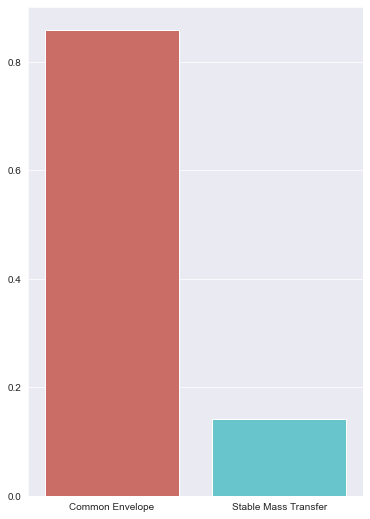

In [93]:
#Lets seperate the two labels.
label_true = full_dataset[(full_dataset['Formation by Common Envelope'] == True)] 
label_false = full_dataset[(full_dataset['Formation by Common Envelope'] == False)] 

#We investigate the population of each class.
t_counts = len(label_true)
f_counts = len(label_false)
# Count the size of the dataset (rows/instances) so we can convert to percentages.
N = len(full_dataset)

print('Total in dataset =',N)

print('Common Envelope =',t_counts)
print('Stable Mass Transfer =',f_counts)

Number_CommonEnv = round(t_counts*100/N,3)
Number_StableMassTrnsfr = round(f_counts*100/N,3)

print('Percentage of Common Envelope instances: ',Number_CommonEnv,'%')
print('Percentage of Stable Mass Transfer instances: ',Number_StableMassTrnsfr,'%')


# A barplot showing the imbalanced dataset.
print('\nThe dataset is imbalanced which means that our classifiers will be biased toward the highly populated class (i.e. Common Envelope)')
fig, ax = plt.subplots(1,figsize=(6,9))
sns.set_style('darkgrid')
uniq_CE , counts_CE = np.unique(full_dataset['Formation by Common Envelope'],return_counts = True)
counts_CE=counts_CE[::-1]
sns.barplot(x=["Common Envelope","Stable Mass Transfer"],y=counts_CE/N,orient="v",palette = 'hls')

plt.show()

### Creating a balanced dataset

We've just seen that the dataset is imbalanced between instances related to common envelope and stable mass transer evolution. This could introduce a bias in our machine learning models, that could partially ignore the least represented category (i.e. stable MT).

We can now balance the dataset by sampling random instances from the largest set, for a number equal to the maximum number of instaces in the smallest set.

In [94]:
# In practice reduce the common envelope set cardinality to 346,004.

# Separate the two labels.
label_true = dataset[(dataset['Formation by Common Envelope'] == True)] 
label_false = dataset[(dataset['Formation by Common Envelope'] == False)]

# Get the size of each label.
t_counts = len(label_true)
f_counts = len(label_false)

# Determine the size of the smallest label.
min_counts = min(t_counts, f_counts)

# Reduce the larger label to the size of the smallest label.
if t_counts > f_counts:
    label_true = label_true.sample(n=min_counts, random_state=1)
else:
    label_false = label_false.sample(n=min_counts, random_state=1)

# Concatenate the two labels.
balanced_dataset = pd.concat([label_true, label_false])

# Count the size of the dataset (rows/instances) so we can convert to percentages.
N = len(balanced_dataset)

print('Total in dataset =', N)
print('Common Envelope =', min_counts)
print('Stable Mass Transfer =', min_counts)

Number_CommonEnv = round(min_counts * 100 / N, 3)
Number_StableMassTrnsfr = round(min_counts * 100 / N, 3)

print('Percentage of Common Envelope instances: ', Number_CommonEnv, '%')
print('Percentage of Stable Mass Transfer instances: ', Number_StableMassTrnsfr, '%')


Total in dataset = 692008
Common Envelope = 346004
Stable Mass Transfer = 346004
Percentage of Common Envelope instances:  50.0 %
Percentage of Stable Mass Transfer instances:  50.0 %


### Filtering out the extreme outliers

We can trim the dataset according to the Semi Major Axis. Filter out the 1% above values 53.2.
The same with Orbital Eccentricity. Filter out the 1% below 0.008 and the 1% above 0.67.



In [95]:
balanced_dataset[['Orbital Eccentricity','Semi Major Axis [Rsun]']].describe(percentiles=[0.01,0.99]).T

,count,mean,std,min,1%,50%,99%,max
Orbital Eccentricity,692008.0,0.074763,0.139523,0.000015,0.007946,0.01602,0.686288,1.0
Semi Major Axis [Rsun],692008.0,26.397353,607.786604,0.664170,3.389100,19.46700,53.129650,329100.0


In [96]:
dataset=balanced_dataset.copy()
# Trim the Orbital Eccentricity:
dataset_trimmed = dataset[(dataset['Orbital Eccentricity'] <= 0.78)]
# Trim the Orbital Eccentricity:
dataset_trimmed = dataset_trimmed[(dataset_trimmed['Orbital Eccentricity'] >= 0.008)]
# Trim the Semi Major Axis:
dataset_trimmed = dataset_trimmed[(dataset_trimmed['Orbital Eccentricity'] <= 52)]
print('Number of removed instances:', len(dataset) - len(dataset_trimmed))

dataset=dataset_trimmed.copy()
dataset_trimmed[['Orbital Eccentricity','Semi Major Axis [Rsun]']].describe(percentiles=[0.01,0.99]).T

Number of removed instances: 11537


,count,mean,std,min,1%,50%,99%,max
Orbital Eccentricity,680471.0,0.071232,0.127306,0.00800,0.008286,0.016089,0.61662,0.77999
Semi Major Axis [Rsun],680471.0,20.767367,12.262600,0.66417,3.412000,19.321000,52.60300,88.30800


Now we have a clean and balanced dataset.

Metallicity samples percetanges in dataset:
 [(0.0002, 26.91), (0.0004, 25.78), (0.0012, 16.66), (0.0016, 13.98), (0.002, 11.36), (0.004, 4.55), (0.006, 0.59), (0.008, 0.11), (0.012, 0.05), (0.016, 0.02), (0.02, 0.01)]

Alpha samples percentages in dataset:
 [(0.5, 22.06), (1.0, 28.08), (3.0, 27.26), (5.0, 22.59)]


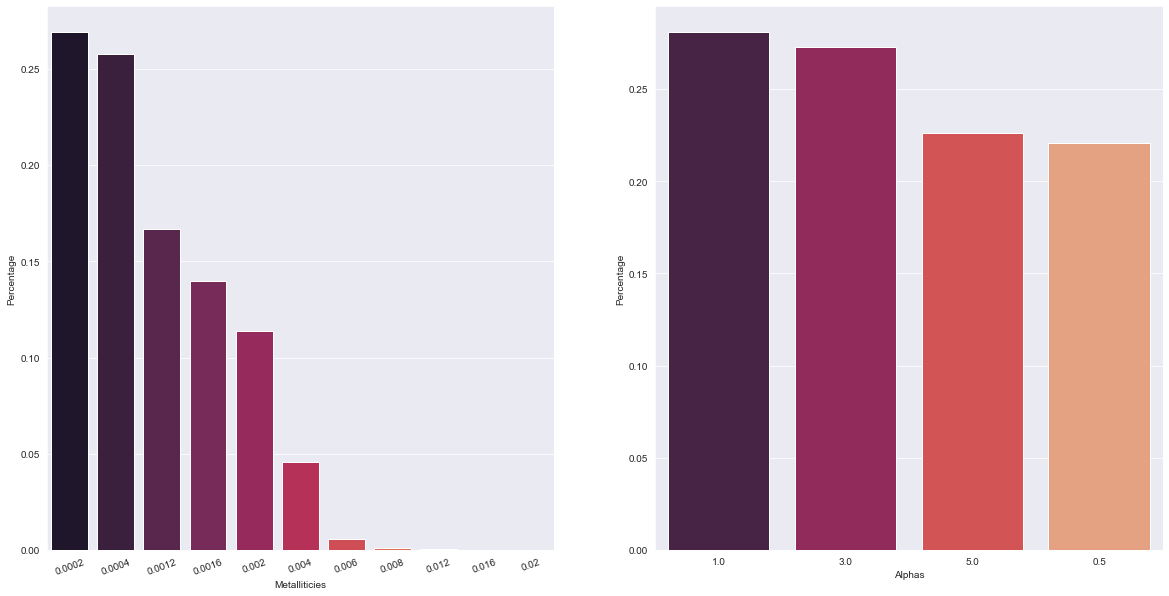

In [97]:
# Count the size of the dataset (rows/instances) so we can convert to percentages .
N = len(dataset)

uniq_met , counts_met = np.unique(dataset['Metallicity'],return_counts = True)
print('Metallicity samples percetanges in dataset:\n', list(zip(uniq_met,np.round(counts_met*100/N,2))))
dfmet=pd.DataFrame([uniq_met,counts_met/N],).T
dfmet.columns =['Metalliticies','Percentage']
print('')

uniq_alph , counts_alph = np.unique(dataset['Alpha'],return_counts = True)
print('Alpha samples percentages in dataset:\n', list(zip(uniq_alph,np.round(counts_alph*100/N,2))))
dfalph=pd.DataFrame([uniq_alph,counts_alph/N],).T
dfalph.columns =['Alphas','Percentage']

fig , ax = plt.subplots(1,2, figsize=(20,10))
#order=df.sort_values('Salary',ascending = False).Education
sns.barplot(x=dfmet["Metalliticies"],y=dfmet["Percentage"],ax=ax[0],order=dfmet.sort_values("Percentage",ascending=False).Metalliticies,orient="v",palette = 'rocket')#.set(title='Metallicities')
sns.barplot(x=dfalph["Alphas"],y=dfalph["Percentage"],ax=ax[1],order=dfalph.sort_values("Percentage",ascending=False).Alphas,orient="v",palette = 'rocket')

ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 20)
plt.show()

As plotted in this histograms we can see that over 80% of the dataset is simulated with the fourth lowest metallicities. 
This is because low metallicities stars loose a small amount of mass during their life due to stellar winds. This implies that when the Roche lobe overflow occurs, metal-poor stars have more mass available that can be transferred to the companion.

On the other hand, the $\alpha$ values are well distributed.

## Alpha labels distribution

In [98]:
# Creating nice labels from the label set
Y_labeled = ['Common Envelope' if truth_value == True else 'Stable MT' for truth_value in dataset['Formation by Common Envelope']]


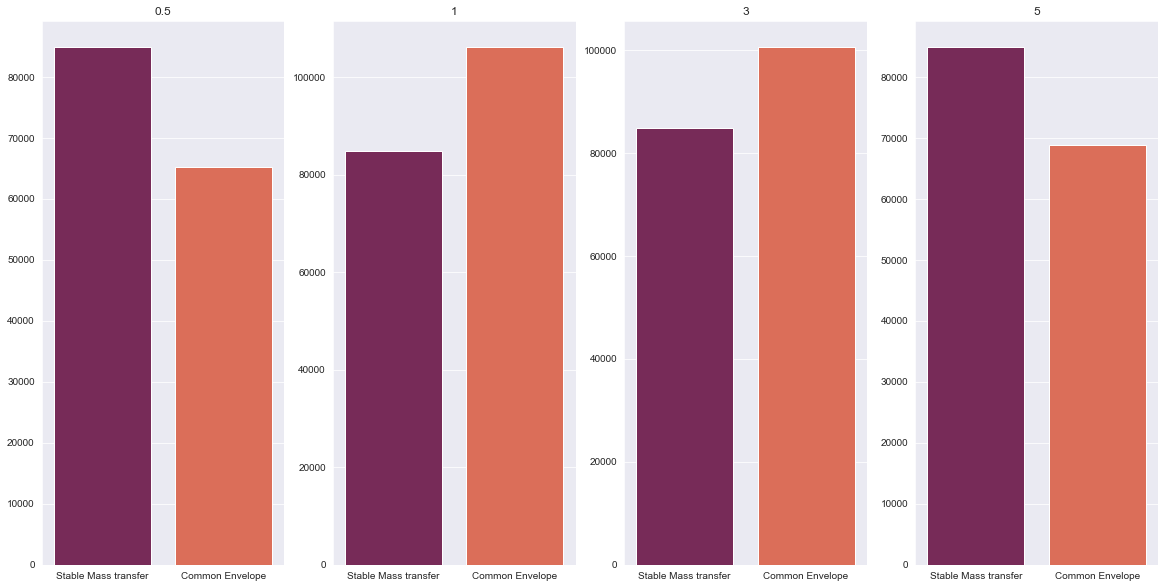

In [99]:
alphas = [0.5,1,3,5]
fig , ax = plt.subplots(1,4, figsize=(20,10))
for i,a_val in enumerate(alphas):
    alpha_n = dataset[dataset['Alpha'] == a_val]

    smt_alpha_n = alpha_n[alpha_n['Formation by Common Envelope'] == False]
    ce_alpha_n = alpha_n[alpha_n['Formation by Common Envelope'] == True]

    sns.barplot(x=['Stable Mass transfer','Common Envelope'],y=[len(smt_alpha_n),len(ce_alpha_n)], ax=ax[i], palette='rocket')
    ax[i].set_title(a_val)


## Metallicity labels distribution

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

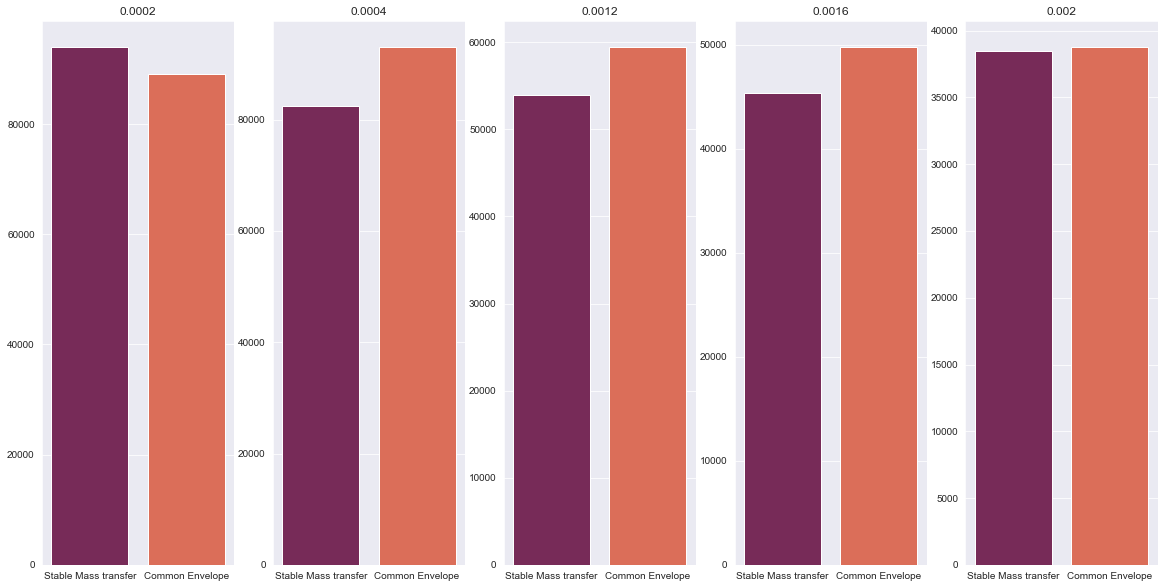

In [100]:
metallicities_row1 = [0.0002, 0.0004, 0.0012, 0.0016, 0.002]

fig , ax = plt.subplots(1,len(metallicities_row1), figsize=(20,10))

for i,metal in enumerate(metallicities_row1):
    
    metal_n = dataset[dataset['Metallicity'] == metal]

    smt_metal_n = metal_n[metal_n['Formation by Common Envelope'] == False]
    ce_metal_n = metal_n[metal_n['Formation by Common Envelope'] == True]

    sns.barplot(x=['Stable Mass transfer','Common Envelope'],y=[len(smt_metal_n),len(ce_metal_n)], ax=ax[i], palette='rocket')
    ax[i].set_title(metal)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

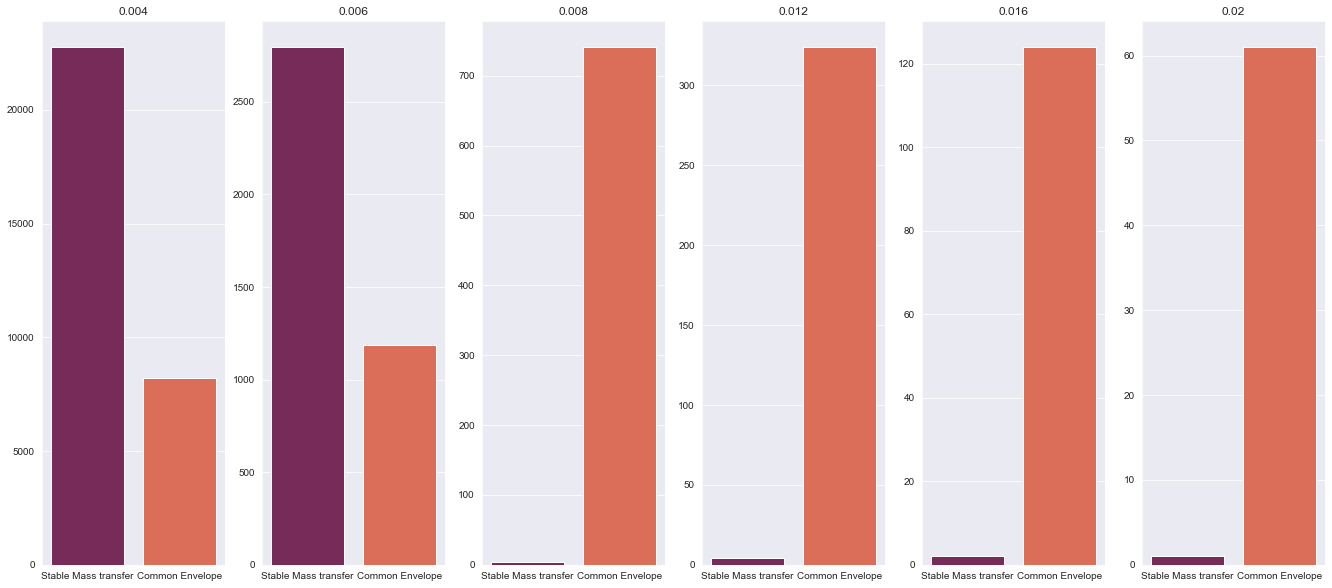

In [101]:
metallicities_row2 = [0.004, 0.006, 0.008, 0.012, 0.016, 0.02]

fig , ax = plt.subplots(1,len(metallicities_row2), figsize=(23,10))

for i,metal in enumerate(metallicities_row2):
    
    metal_n = dataset[dataset['Metallicity'] == metal]

    smt_metal_n = metal_n[metal_n['Formation by Common Envelope'] == False]
    ce_metal_n = metal_n[metal_n['Formation by Common Envelope'] == True]

    sns.barplot(x=['Stable Mass transfer','Common Envelope'],y=[len(smt_metal_n),len(ce_metal_n)], ax=ax[i], palette='rocket')
    ax[i].set_title(metal)
plt.tight_layout

## Dataset visualization

#### Mass distribution 

We shall now see how the two different evolution paths are distributed within masses.
For what concerns the ZAMS mass of the first component of the binary, we observe that common envelope is the main and only formation channel for mass values below $40 M_{\odot}$ . This is due to the fact that low mass stars that undergo stable mass transfer tend not to form a BBH system that merges within a Hubble time.



In [102]:
Y_labelling = ['Common Envelope' if truth_value == True else 'Stable MT'
                                           for truth_value in dataset['Formation by Common Envelope']
                                          ]

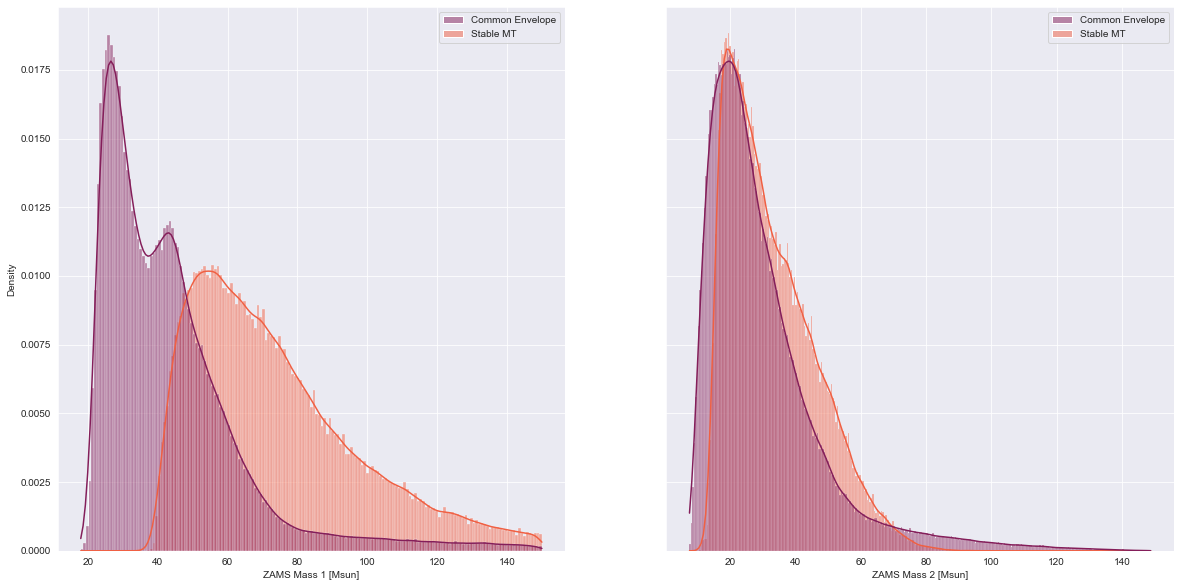

In [103]:
fig , ax = plt.subplots(1,2,figsize=(20,10),sharey=True,)

sns.histplot(x=dataset['ZAMS Mass 1 [Msun]'], kde=True,stat="density",hue=Y_labelling,ax=ax[0],palette="rocket")
sns.histplot(x=dataset['ZAMS Mass 2 [Msun]'], kde=True,stat="density",hue=Y_labelling,ax=ax[1],palette="rocket")

plt.show()

We can do the same for the distribution of masses of the resulting black holes.
We see a similar pattern in the data.

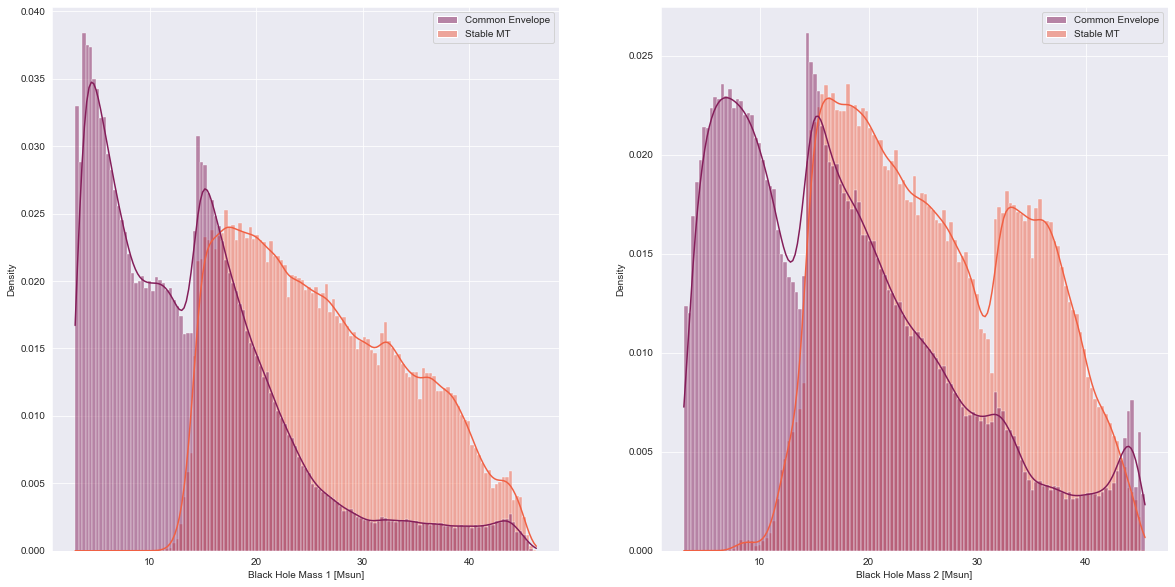

In [104]:
fig , ax = plt.subplots(1,2,figsize=(20,10))

sns.histplot(data=dataset, x='Black Hole Mass 1 [Msun]',ax=ax[0],label=None,kde=True,stat="density",hue=Y_labelling,palette="rocket")
sns.histplot(data=dataset, x='Black Hole Mass 2 [Msun]',ax=ax[1],label=None,kde=True,stat="density",hue=Y_labelling,palette="rocket")

plt.tight_layout
plt.show()


## Initial Binaris and Blackholes Mass Ratio

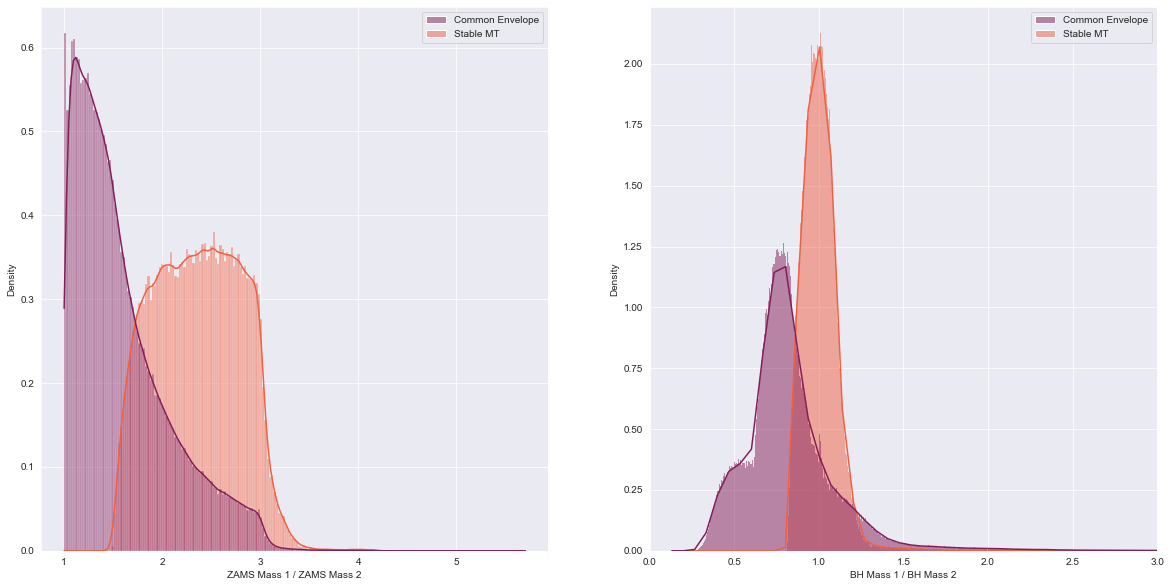

In [105]:
q_sol = dataset['ZAMS Mass 1 [Msun]'] / dataset['ZAMS Mass 2 [Msun]']
q_bh = dataset['Black Hole Mass 1 [Msun]'] / dataset['Black Hole Mass 2 [Msun]']
fig , ax = plt.subplots(1,2,figsize=(20,10))
#df = pd.DataFrame(dataset[dataset['Semi Major Axis [Rsun]']<150])
#print(len(df))
sns.histplot(x=q_sol,kde=True,stat="density",ax=ax[0],hue=Y_labeled,palette="rocket")
sns.histplot(x=q_bh,kde=True,stat="density",ax=ax[1],hue=Y_labeled,palette="rocket")
ax[0].set_xlabel('ZAMS Mass 1 / ZAMS Mass 2')
ax[1].set_xlabel('BH Mass 1 / BH Mass 2')
ax[1].set_xlim(0,3)
plt.savefig(r"C:\Users\micha\Desktop\UNIPD\Laboratory of Computational Physics MODA\Project\Images\QQQQ")
plt.show()

## Semi major axis

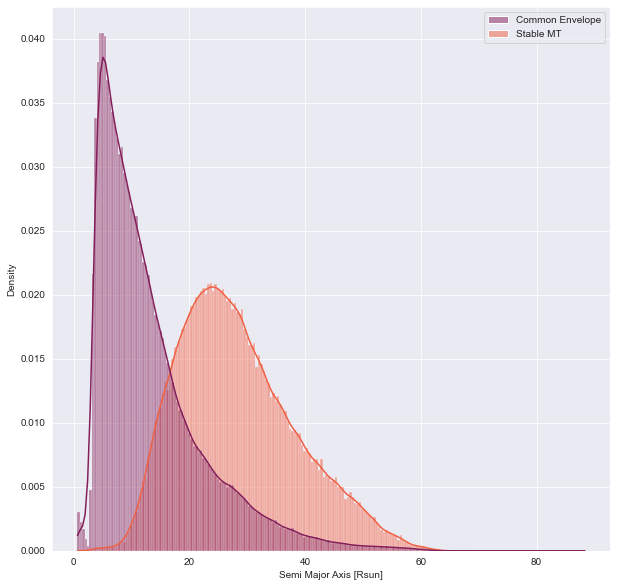

In [106]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
#df = pd.DataFrame(dataset[dataset['Semi Major Axis [Rsun]']<150])
#print(len(df))
sns.histplot(data=dataset,x='Semi Major Axis [Rsun]',kde=True,stat="density",hue=Y_labelling,palette="rocket")
plt.show()

### Orbital Eccentricity

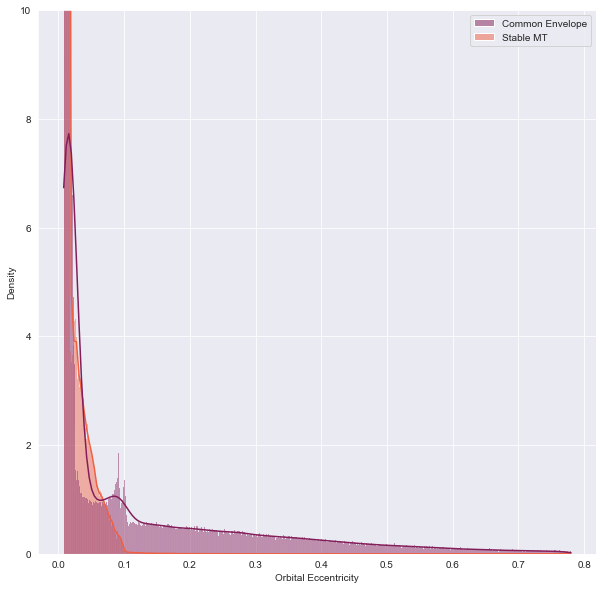

In [107]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
#df = pd.DataFrame(dataset[dataset['Orbital Eccentricity']<150])
#print(len(df))
g = sns.histplot(x=dataset['Orbital Eccentricity'],kde=True,stat="density",hue=Y_labeled,palette="rocket")
g.set(ylim=(0,10))
#plt.show()
plt.savefig(r"C:\Users\micha\Desktop\UNIPD\Laboratory of Computational Physics MODA\Project\Images\OrbitalEcc")

### Formation Delay Time

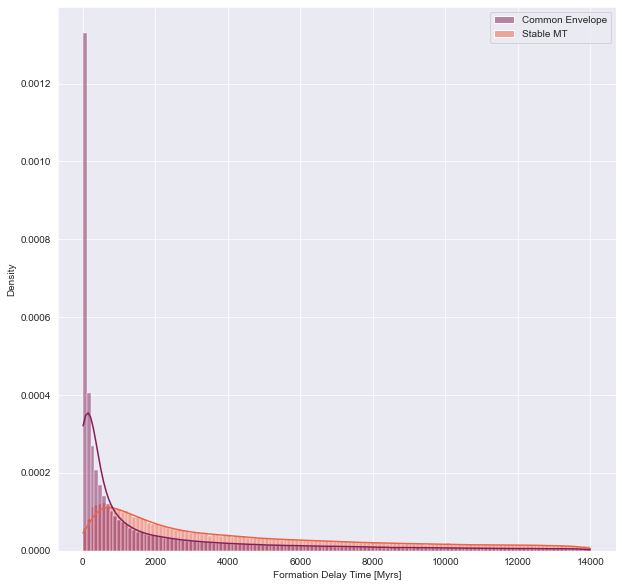

In [108]:
fig , ax = plt.subplots(1,1,figsize=(10,10))
#df = pd.DataFrame(dataset[dataset['Orbital Eccentricity']<150])
#print(len(df))
g = sns.histplot(x=dataset['Formation Delay Time [Myrs]'],kde=True,stat="density",hue=Y_labeled,palette="rocket")
#plt.show()
plt.savefig(r"C:\Users\micha\Desktop\UNIPD\Laboratory of Computational Physics MODA\Project\Images\formDeltim")

# Separating features and labels

We also add two new features in our dataset, the ratio of the inital masses and the ratio of the resulting black hole masses.


In [109]:
# drop Binary ID , label set, the rest keep as features.

X = dataset.drop(columns = ['Binary ID','Formation by Common Envelope'])   #Dropping the ID and Label columns.
Y = dataset['Formation by Common Envelope'].astype(int)    #Extracting and Transforming the Booleans to 0-1. This is crucial for the ML algorithms.

#Create the features of ratios
X['BHQ'] = X['Black Hole Mass 1 [Msun]'] / X['Black Hole Mass 2 [Msun]']
X['Q'] = X['ZAMS Mass 1 [Msun]'] / X['ZAMS Mass 2 [Msun]']

# Correlation matrix and normalization

Here we show that correlations are invariant to the normalization of features.

For each feature the mean and the std are computed and these are use for normalization.

In [110]:
np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
pd.set_option("chop_threshold", 1e-10)

X_norm = pd.DataFrame(StandardScaler().fit_transform(X),columns=X.columns)

X_norm.describe().T[['mean','std']]

,mean,std
ZAMS Mass 1 [Msun],0.000000e+00,1.000001
ZAMS Mass 2 [Msun],0.000000e+00,1.000001
Black Hole Mass 1 [Msun],0.000000e+00,1.000001
Black Hole Mass 2 [Msun],0.000000e+00,1.000001
Formation Delay Time [Myrs],0.000000e+00,1.000001
Semi Major Axis [Rsun],0.000000e+00,1.000001
Orbital Eccentricity,0.000000e+00,1.000001
Alpha,0.000000e+00,1.000001
Metallicity,0.000000e+00,1.000001
BHQ,0.000000e+00,1.000001


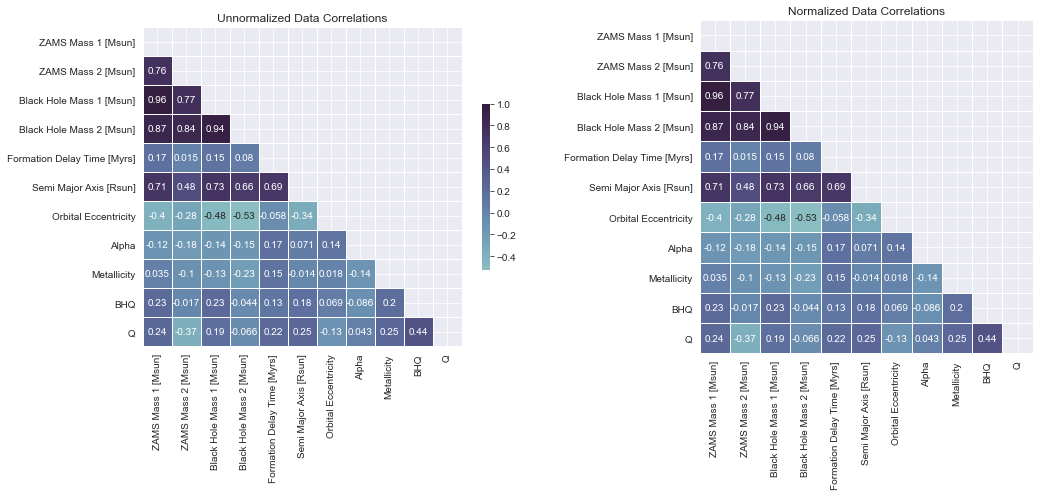

In [111]:
# Lets find the correlation of the features.
correlation_matrix =  X.corr()   
# Set up the matplotlib figure.
f, ax = plt.subplots(1,2,figsize=(15, 7))

# Generate a custom diverging colormap.
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

#mask to make it triangular
matrix = np.triu(X.corr())

# Draw the heatmap with the mask and correct aspect ratio.
sns.heatmap(correlation_matrix, cmap=cmap, vmax=1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .5}, ax=ax[0],annot=True, mask=matrix).set(title='Unnormalized Data Correlations')

# Compute again the corraletion matrix. By visually comparing the two correlation matrices we can see that they are the same.
norm_correlation_matrix = X_norm.corr() 
#and plot
sns.heatmap(norm_correlation_matrix, cmap=cmap, vmax=1, center=0, square=True, linewidths=1, cbar=False, ax=ax[1],annot=True, mask=matrix).set(title='Normalized Data Correlations')

plt.tight_layout()
plt.show()

We can visualize how the transformation worked on the dataset.

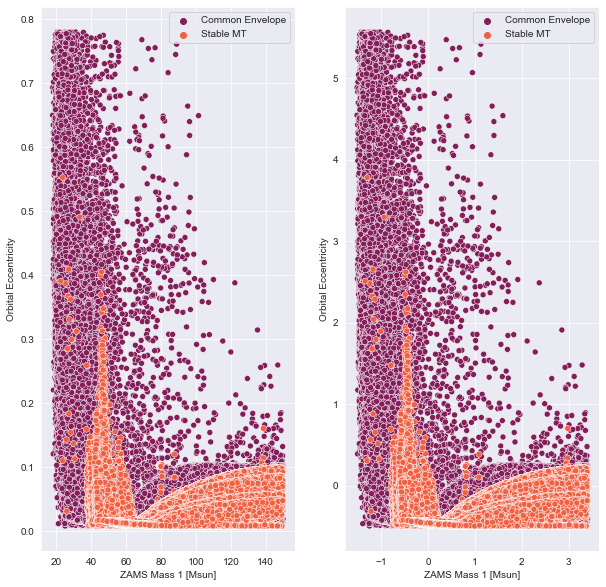

In [112]:
fig,ax = plt.subplots(ncols=2, figsize=(10,10))

sns.scatterplot(x=X['ZAMS Mass 1 [Msun]'], y=X['Orbital Eccentricity'],hue=Y_labelling,legend=True,palette='rocket',ax=ax[0])
sns.scatterplot(x=X_norm['ZAMS Mass 1 [Msun]'], y=X_norm['Orbital Eccentricity'],hue=Y_labelling,legend=True, palette='rocket',ax=ax[1])
plt.legend(loc='upper right')
plt.tight_layout
plt.show()

### Performing Principal Component Analysis (PCA) in raw and normalized data

We ispect the dataset for the possibility of dimensionality reduction by performing PCA. This doesn't actually help us with the ultimate task of finding feature importance, but it will give us an idea of how many dimensions are relevant in the space of covariance. If PCA showed that dimensionality reduction is possible, it would be a good indicator that some features are better than others. If PCA showed instead that all PCs are relevant then this is an indication that most features are important in the sense that most of them contribute to the variance of the data.

Moreover, we observe that PCA is sensitive to the scaling of the data. This means that it will assign high relevance to the largest-valued features (for instance, ZAMS mass), whilst ignoring small-valued feature, like orbital eccentricty (even if it could have some physical importance).

In [113]:
# raw
pca = PCA(n_components=7)
pca.fit(X)
np.set_printoptions(precision=10,suppress=True)
print(pca.explained_variance_ratio_*100)

[99.9905175578  0.0084508989  0.0006789144  0.000221891   0.0000898496
  0.0000225834  0.0000175168]


We got 99.99% of variance in one direction with the raw data.

In [114]:
raw = pca.explained_variance_ratio_*100

In [115]:
# and standardized

pca = PCA(n_components=7)
pca.fit(X_norm)
np.set_printoptions(precision=10,suppress=True)
print(pca.explained_variance_ratio_*100)

[40.6885862987 18.1173820397 12.1419907892  8.5886000882  8.2484080996
  6.2124685754  4.2629455628]


We see indeed that more than just one component is needed for explaining the variance.

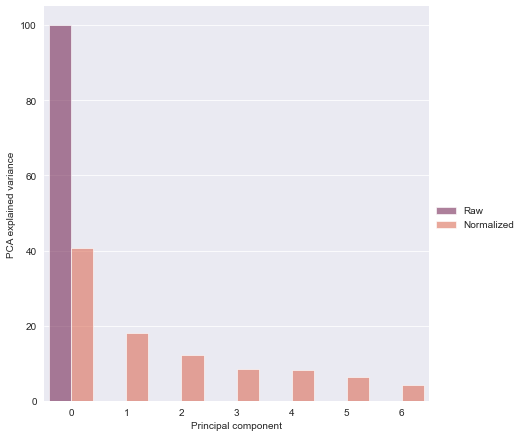

In [133]:
pca_hist = pd.DataFrame({'PCA explained variance' : np.append(raw, pca.explained_variance_ratio_*100)})

raw_col = np.array(['Raw' for raw_value in raw])
nor_col = ['Normalized' for nor_value in pca.explained_variance_ratio_*100]
is_nor  = np.append(raw_col,nor_col) #is the PC standardized?

pca_hist['is_nor'] = is_nor

pca_hist['# PC'] = np.append(np.arange(7),np.arange(7))


pca_plot = sns.catplot(
    data=pca_hist, kind="bar",x="# PC", y="PCA explained variance", hue="is_nor", palette="rocket", alpha=.6, height=6)

pca_plot.despine(left=True)
pca_plot.set_axis_labels("Principal component", "PCA explained variance")
pca_plot.legend.set_title("")

In any case, we are not using PCA for training our machine learning models because perfroming an inverse-transform to the output of the machine learning model is not always possible.

# Classification task and feature importance

We run some simple machine learning algorithm in order to extract the most important features in our dataset.

We compare Linear SVM, Random forest, and a Neural Network. We use sklearn built-in feature importance methods, such as permutation importance and mean decrease in impurity (MDI). For the linear SVM we also interpret the coefficients found by the model to infer feature importance. 

Finally, we implement a custom made measure that compares the accuracy of the model with all the features against the accuracy of the model without using the feature we want to assess.

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from IPython.display import clear_output


#### Drawing plots

In [118]:
def plot_feat_permutation_importances(model, X_test, y_test):
    fig, ax = plt.subplots(1,1, figsize=(8,5))
    
    result = permutation_importance(model, X_test, y_test, scoring='accuracy', n_repeats=10, n_jobs=-1)    
    importances = pd.Series(result.importances_mean, index=X_test.columns)
    
    sns.barplot(y=X_test.columns,x=importances,orient="h",palette='rocket',ax=ax)
    
    ax.set_title("Feature importances using permutation")
    ax.set_xlabel("Mean accuracy decrease")
    plt.show()
    return

In [119]:
def plot_feat_mdi(model, X_test, y_test):
    fig, ax = plt.subplots(1,1, figsize=(8,5))
    
    importances = model.feature_importances_
    
    sns.barplot(y=X_test.columns, x=importances, orient="h", palette='rocket', ax=ax)
    
    ax.set_title("Feature importances using MDI")
    ax.set_xlabel("Mean decrease in impurity")
    plt.show()

# Defining Custom Feature Importance Function

In [120]:
def feat_omit_imp(model,X_train,y_train,X_test,y_test):
    scores=[]
    dif=[]
    #score.append(['All',model.score(X_test)])
    for col in X_train.columns:
        #drop a columns
        ds_train, ds_test = X_train.drop(columns=col), X_test.drop(columns=col)
        #fit the model
        model.fit(ds_train,y_train)
        #score the classifier and keep the value of the accuracy for that specific columns we ommited
        model_score = model.score(ds_test,y_test)
        scores.append([col,model_score])
    model.fit(X_train,y_train)
    baseline = model.score(X_test,y_test)
    dif = [ 100*(baseline - scores[i][1]) for i in range(len(scores))]
    
    return baseline, scores, dif

In [121]:
def plot_omit(dif):
    fig, ax = plt.subplots(1,1, figsize=(8,5))
    ax=sns.barplot(y=X_train.columns,x=dif,orient="h",palette='rocket',ax=ax )
    ax.set_title("Feature importances by ommiting features")
    ax.set_xlabel("Difference from baseline")

## Train test split and Normalization

In [122]:
# Use Train-Test-Split. Note that once the user specifies the size of the train set, then the test set is the remainder.

X_train, X_test, y_train, y_test = train_test_split(X ,Y, train_size=0.5, test_size=0.5, random_state=None, shuffle=True)

# We also shuffle the instances before splitting.

#And normalization of data
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train),columns=X_train.columns, index=X_train.index)

X_test = pd.DataFrame(StandardScaler().fit_transform(X_test),columns=X_test.columns, index=X_test.index)

# Linear SVM
The easiest way to understand feature importance is the Linear Classification problem (Halfspace). The importance of each feature is nothing else but the coefficients of the dividing plane. We performed Gridsearch and found the best hyperparameters.


In [123]:
#Define Linear model
lin_svm = LinearSVC(penalty='l2',
                    dual=False,
                    C=0.1,
                    max_iter=100,
                    loss='squared_hinge',
                    fit_intercept=True, 
                    verbose=False, 
                    random_state=None)


In [125]:
#Find Train and Test score
lin_svm.fit(X_train,y_train)
print('Linear SVM score on normalized train set:',round(lin_svm.score(X_train,y_train)*100,3),'%') 
print('Linear SVM score on normalized test set:',round(lin_svm.score(X_test,y_test)*100,3),'%')

Linear SVM score on normalized train set: 98.47 %
Linear SVM score on normalized test set: 98.491 %


Intercept= [0.5941575762]
Coefficients are:
ZAMS Mass 1 [Msun]             1.084958
ZAMS Mass 2 [Msun]             2.565057
Black Hole Mass 1 [Msun]       6.646210
Black Hole Mass 2 [Msun]       1.677759
Formation Delay Time [Myrs]    0.311279
Semi Major Axis [Rsun]         0.847178
Orbital Eccentricity           0.505849
Alpha                          0.008732
Metallicity                    0.170485
BHQ                            1.422538
Q                              1.021084
dtype: float64


Text(0.5, 1.0, 'Coefficients of the Linear SVM')

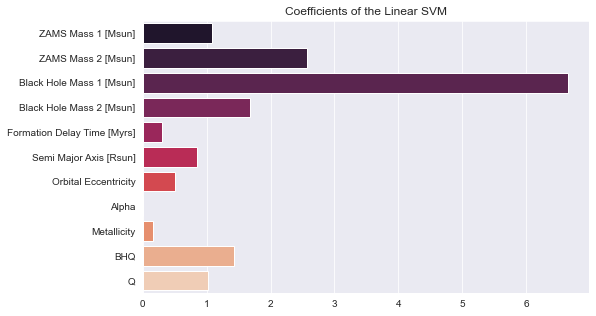

In [126]:
# Get the coefficients and plot them
coef = pd.Series(abs(lin_svm.coef_[0]), index=X_train.columns)
print('Intercept=',lin_svm.intercept_)
print('Coefficients are:')
print(coef)
fig , ax = plt.subplots(1,1,figsize=(8,5))
sns.barplot(y=coef.index,x=coef,saturation=0.8,orient="h",palette='rocket',ax=ax)
ax.set_title('Coefficients of the Linear SVM')

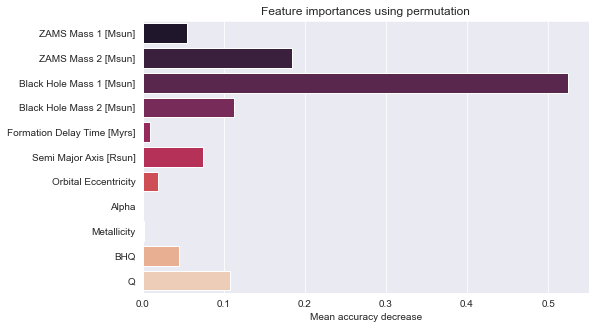

In [127]:
plot_feat_permutation_importances(lin_svm,X_test,y_test)

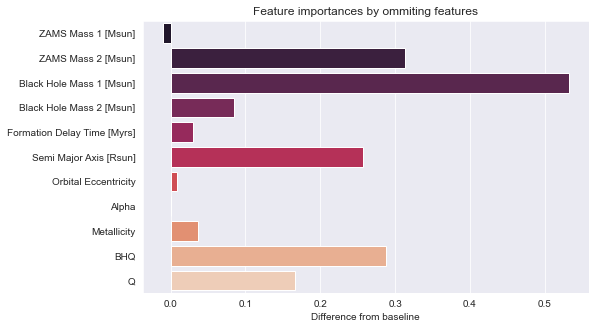

In [136]:
# Find column ommiting feature importance and plot the differences from the baseline
baseline, scores, dif = feat_omit_imp(lin_svm,X_train,y_train,X_test,y_test)

plot_omit(dif)

# Random Forest

In [128]:
# Optimum hyperparameters from GridSearchCV: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 75}

rfc = RandomForestClassifier(n_estimators=75, 
                       criterion='gini', 
                       max_depth=10, 
                       min_samples_split=10, 
                       min_samples_leaf=5, 
                       min_weight_fraction_leaf=0.0, 
                       max_features='sqrt', 
                       max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, 
                       bootstrap=True, 
                       oob_score=False, 
                       n_jobs=-1, 
                       random_state=None, 
                       verbose=False, 
                       warm_start=False, 
                       ccp_alpha=0.0 )

In [129]:
rfc.fit(X_train,y_train)
clear_output()
print('Random Forest score on normalized train set:',round(rfc.score(X_train,y_train)*100,3),'%')
print('Random Forest score on normalized test set:',round(rfc.score(X_test,y_test)*100,3),'%')

Random Forest score on normalized train set: 99.039 %
Random Forest score on normalized test set: 98.965 %


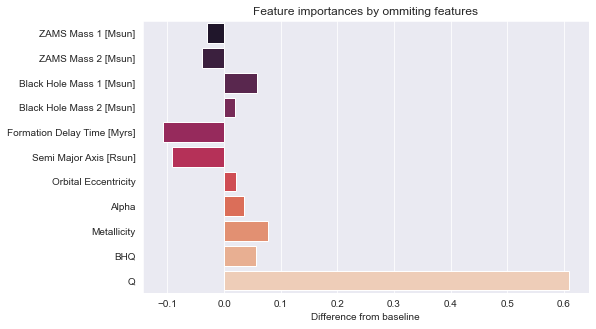

In [130]:
# Find column ommiting feature importance and plot the differences from the baseline
baseline, scores, dif = feat_omit_imp(rfc,X_train,y_train,X_test,y_test)

plot_omit(dif)

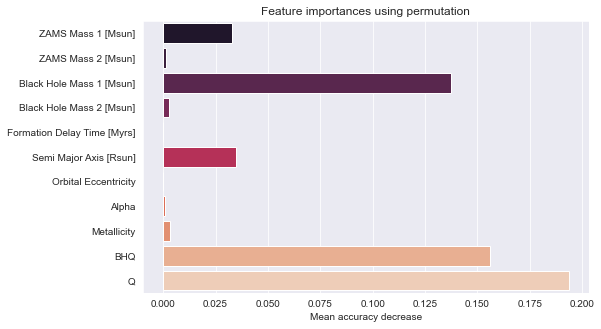

In [131]:
#permutation importance
plot_feat_permutation_importances(rfc,X_test,y_test)

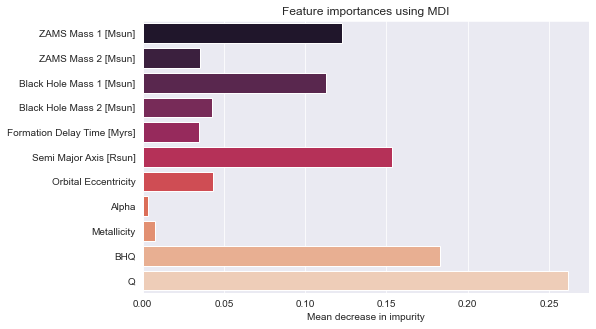

In [132]:
#Mean Difference in impurity
plot_feat_mdi(rfc,X_test,y_test)

# Neural Network

In [78]:
mlp = MLPClassifier(hidden_layer_sizes=(1), 
                    activation='logistic',
                    solver='adam',
                    alpha=0.01,
                    batch_size= 10, 
                    learning_rate='adaptive', 
                    learning_rate_init=1e-05, 
                    #beta_1
                    #beta_2
                    #epsilon
                    max_iter=40,
                    tol=0.001, 
                    verbose=1,
                    early_stopping=True,
                    n_iter_no_change=3 )

mlp.fit(X_train,y_train)
clear_output()
print('Neural Net score on normalized train set:',round(mlp.score(X_train,y_train)*100,3),'%')
print('Neural Net score on normalized test set:',round(mlp.score(X_test,y_test)*100,3),'%')

Neural Net score on normalized train set: 97.517 %
Neural Net score on normalized test set: 97.543 %


Text(0, 0.5, 'Loss/Accuracy')

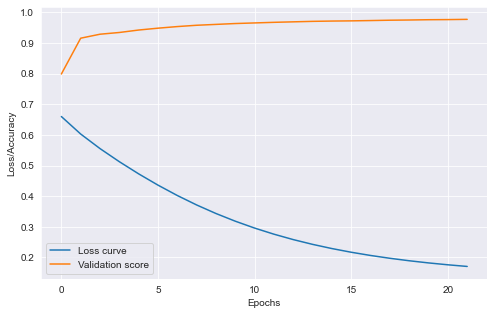

In [79]:
# Plots of the Loss curve and the Validation score measured in Accuracy(score).

fig, ax = plt.subplots(1,1, figsize=(8, 5))

sns.lineplot(x=np.arange(mlp.n_iter_), y=mlp.loss_curve_, ax=ax, palette='icefire',label='Loss curve')
sns.lineplot(x=np.arange(mlp.n_iter_), y=mlp.validation_scores_, ax=ax, palette='icefire', label='Validation score')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss/Accuracy')

Intercept= [[5.3499089427]]
Coefficients are:
ZAMS Mass 1 [Msun]             0.873454
ZAMS Mass 2 [Msun]             1.367729
Black Hole Mass 1 [Msun]       1.581985
Black Hole Mass 2 [Msun]       0.742144
Formation Delay Time [Myrs]    0.143332
Semi Major Axis [Rsun]         1.263354
Orbital Eccentricity           2.059317
Alpha                          0.003088
Metallicity                    0.478338
BHQ                            0.474261
Q                              2.527383
dtype: float64


[Text(0.5, 1.0, 'Coefficients')]

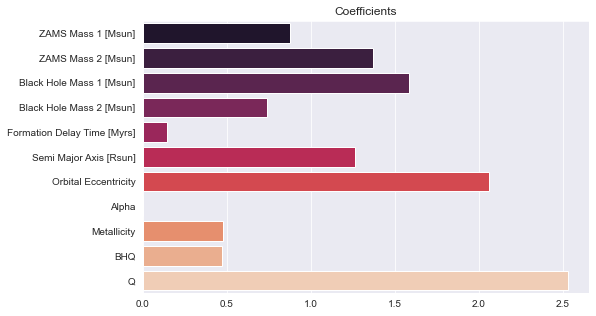

In [135]:
# Get the coefficients and plot them
coef = pd.Series(abs(mlp.coefs_[0].T[0]), index=X_train.columns)
print('Intercept=',mlp.coefs_[1])
print('Coefficients are:')
print(coef)
fig, ax = plt.subplots(1, figsize=(8,5))
sns.barplot(y=coef.index,x=coef,saturation=0.8,orient="h",palette='rocket',ax=ax)
ax.set(title='Coefficients')

Iteration 1, loss = 0.64746955
Validation score: 0.642341
Iteration 2, loss = 0.58574188
Validation score: 0.825241
Iteration 3, loss = 0.53350411
Validation score: 0.897396
Iteration 4, loss = 0.48738530
Validation score: 0.930138
Iteration 5, loss = 0.44596565
Validation score: 0.944627
Iteration 6, loss = 0.40844272
Validation score: 0.951681
Iteration 7, loss = 0.37456301
Validation score: 0.956178
Iteration 8, loss = 0.34407431
Validation score: 0.959646
Iteration 9, loss = 0.31672841
Validation score: 0.962233
Iteration 10, loss = 0.29233880
Validation score: 0.963996
Iteration 11, loss = 0.27065091
Validation score: 0.965554
Iteration 12, loss = 0.25147868
Validation score: 0.966906
Iteration 13, loss = 0.23457948
Validation score: 0.968375
Iteration 14, loss = 0.21976374
Validation score: 0.969492
Iteration 15, loss = 0.20680922
Validation score: 0.970462
Iteration 16, loss = 0.19557792
Validation score: 0.971285
Iteration 17, loss = 0.18587417
Validation score: 0.972137
Iterat

Iteration 12, loss = 0.26285548
Validation score: 0.958000
Iteration 13, loss = 0.24704369
Validation score: 0.959793
Iteration 14, loss = 0.23309523
Validation score: 0.961410
Iteration 15, loss = 0.22079412
Validation score: 0.963173
Iteration 16, loss = 0.21004308
Validation score: 0.964643
Iteration 17, loss = 0.20063814
Validation score: 0.966053
Iteration 18, loss = 0.19244012
Validation score: 0.967376
Iteration 19, loss = 0.18533581
Validation score: 0.968405
Iteration 20, loss = 0.17917433
Validation score: 0.969639
Iteration 21, loss = 0.17383811
Validation score: 0.970727
Iteration 22, loss = 0.16924381
Validation score: 0.971520
Iteration 23, loss = 0.16528656
Validation score: 0.972167
Iteration 24, loss = 0.16187088
Validation score: 0.972578
Iteration 25, loss = 0.15892415
Validation score: 0.973078
Validation score did not improve more than tol=0.001000 for 3 consecutive epochs. Stopping.
Iteration 1, loss = 0.77345781
Validation score: 0.499089
Iteration 2, loss = 0.69

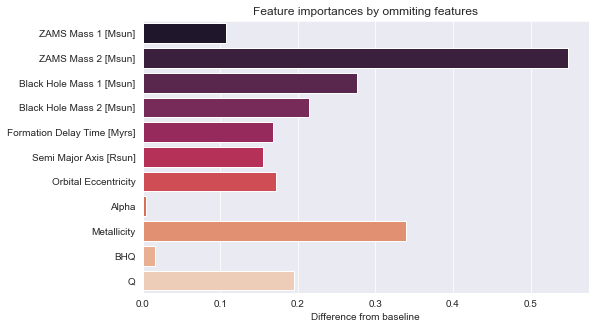

In [87]:
# Find column ommiting feature importance and plot the differences from the baseline
baseline, scores, dif = feat_omit_imp(mlp,X_train,y_train,X_test,y_test)
clear_output()
plot_omit(dif)

In [90]:
baseline,scores

(0.9740062779952738,
 [['ZAMS Mass 1 [Msun]', 0.9729305540859874],
  ['ZAMS Mass 2 [Msun]', 0.9685277278124595],
  ['Black Hole Mass 1 [Msun]', 0.9712493680856817],
  ['Black Hole Mass 2 [Msun]', 0.9718636475857934],
  ['Formation Delay Time [Myrs]', 0.9723250919949682],
  ['Semi Major Axis [Rsun]', 0.9724485357222634],
  ['Orbital Eccentricity', 0.9722839440858698],
  ['Alpha', 0.9739621909498113],
  ['Metallicity', 0.9706145146310208],
  ['BHQ', 0.9738475646316086],
  ['Q', 0.9720546914494644]])

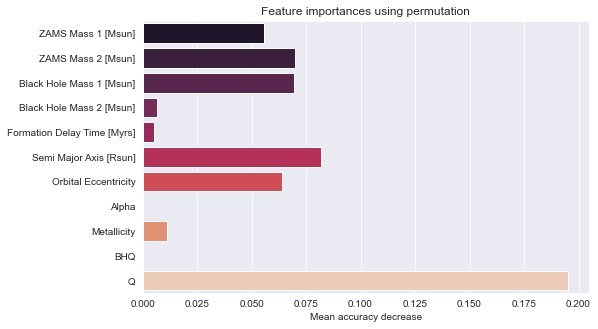

In [86]:
plot_feat_permutation_importances(mlp,X_test,y_test)